In [ ]:
# import library
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error
import time

In [ ]:
# import dataset
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Deep Learning')

Mounted at /content/drive


In [ ]:
start_time_total = time.time()

In [ ]:
# Load the text files
WaterHeatermaxAgg = np.loadtxt('WaterHeatermaxAgg.txt') # Max Total Consumption
WaterHeatermaxApp = np.loadtxt('WaterHeatermaxApp.txt') # Max Coffee Machine Consumption
Input_Data = np.loadtxt('Input_Data.txt', delimiter=',') # Total Consumption
Output_Data = np.loadtxt('Output_Data.txt', delimiter=',') # Coffe Machine Consumption

In [ ]:
print('The max total Consumption is: ',WaterHeatermaxAgg)
print('The max WaterHeater Consumption is: ',WaterHeatermaxApp)

The max total Consumption is:  5931.578125
The max WaterHeater Consumption is:  2149.7


In [ ]:
Input_Data

array([[0.054088, 0.054083, 0.05408 , ..., 0.066108, 0.066137, 0.066005],
       [0.013055, 0.013047, 0.013121, ..., 0.025254, 0.025338, 0.025338],
       [0.059177, 0.045464, 0.058345, ..., 0.606866, 0.060055, 0.0657  ],
       ...,
       [0.018442, 0.018242, 0.01841 , ..., 0.014525, 0.01448 , 0.014599],
       [0.041715, 0.048076, 0.041986, ..., 0.044385, 0.042056, 0.041104],
       [0.349309, 0.324813, 0.324813, ..., 0.260731, 0.263768, 0.307599]])

In [ ]:
# Input Shape
Input_Data.shape

(50000, 120)

In [ ]:
Output_Data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Output shape
Output_Data.shape

(50000, 120)

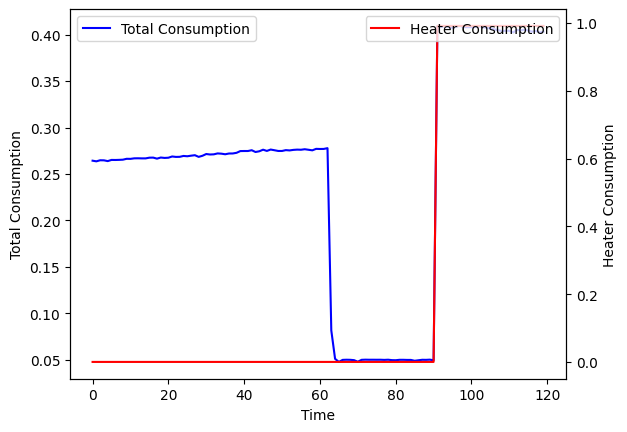

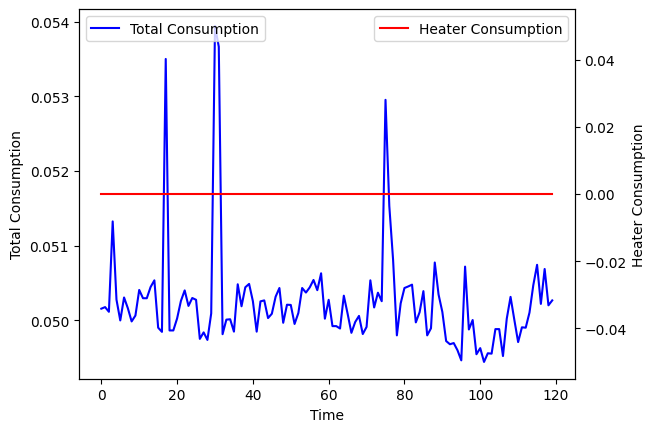

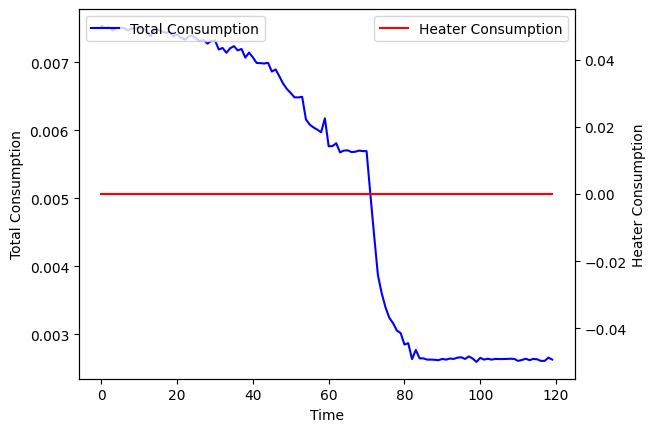

In [ ]:
# Set the random seed
np.random.seed(52)

# Generate random indices to select rows
random_indices = np.random.choice(len(Input_Data), size=3, replace=False)

# Select three random rows from each dataset
random_rows_dataset1 = Input_Data[random_indices]
random_rows_dataset2 = Output_Data[random_indices]

# Print 3 plots of Total and Appliance consumption for 3 random time periods
for i, index in enumerate(random_indices):

  y1 = Input_Data[index]
  y2 = Output_Data[index]

  # Create a figure and set up two y-axes
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()

  ax1.plot(y1, 'b-', label='Total Consumption')
  ax2.plot(y2, 'r-', label='Heater Consumption')

  # Set labels and legends
  ax1.set_xlabel('Time')
  ax1.set_ylabel('Total Consumption')
  ax2.set_ylabel('Heater Consumption')
  ax1.legend(loc='upper left')
  ax2.legend(loc='upper right')

  # Show the plot
  plt.show()


In [ ]:
# Transform Watt to kW
norm_WaterHeatermaxAgg = WaterHeatermaxAgg/1000
norm_WaterHeatermaxApp = WaterHeatermaxApp/1000

In [ ]:
# Normalize input and output data
norm_Input_Data = Input_Data / norm_WaterHeatermaxAgg
norm_Output_Data = Output_Data / norm_WaterHeatermaxApp

In [ ]:
# split train & test sets(20%)
x_train, x_test, y_train, y_test = train_test_split(norm_Input_Data, norm_Output_Data, test_size=0.2, random_state=42)

In [ ]:
# Train/Test Shapes
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (40000, 120)
x_test shape: (10000, 120)
y_train shape: (40000, 120)
y_test shape: (10000, 120)


**Recurrent Neural Network (RNN)**

In [ ]:
# Early Stopping(validation error no drop after 5 consecutive epochs)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Number of epochs
epochs = 40

In [ ]:
# Create RNN model
RNN_model = Sequential()
RNN_model.add(SimpleRNN(64, input_shape=(120, 1), return_sequences=True))
RNN_model.add(SimpleRNN(32, return_sequences=True))
RNN_model.add(Dense(1))
RNN_model.compile(optimizer=Adam(), loss=MeanSquaredError())

In [ ]:
# Fit RNN model

start_time = time.time()

history_rnn = RNN_model.fit(x_train, y_train, epochs=epochs,
                            validation_split=0.2, callbacks=[early_stopping])


end_time = time.time()
training_time_rnn = end_time - start_time

Epoch 1/40
1000/1000 [==============================] - 215s 208ms/step - loss: 0.0152 - val_loss: 0.0139
Epoch 2/40
1000/1000 [==============================] - 214s 214ms/step - loss: 0.0134 - val_loss: 0.0128
Epoch 3/40
1000/1000 [==============================] - 173s 173ms/step - loss: 0.0127 - val_loss: 0.0115
Epoch 4/40
1000/1000 [==============================] - 173s 173ms/step - loss: 0.0124 - val_loss: 0.0131
Epoch 5/40
1000/1000 [==============================] - 170s 170ms/step - loss: 0.0116 - val_loss: 0.0111
Epoch 6/40
1000/1000 [==============================] - 169s 169ms/step - loss: 0.0114 - val_loss: 0.0112
Epoch 7/40
1000/1000 [==============================] - 173s 173ms/step - loss: 0.0111 - val_loss: 0.0102
Epoch 8/40
1000/1000 [==============================] - 171s 171ms/step - loss: 0.0110 - val_loss: 0.0115
Epoch 9/40
1000/1000 [==============================] - 169s 169ms/step - loss: 0.0106 - val_loss: 0.0103
Epoch 10/40
1000/1000 [=======================

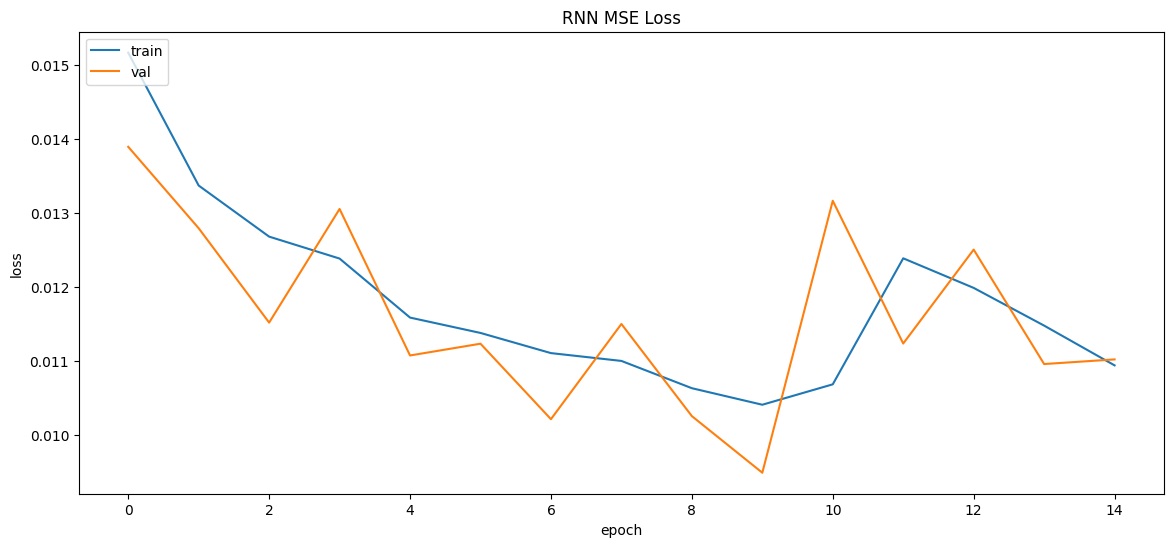

RNN train loss: 0.010944323614239693
RNN val loss: 0.011024942621588707


In [ ]:
# Plot the history performance scores for Train and Val sets
plt.figure(figsize=(14,6))
plt.plot(history_rnn.history[list(history_rnn.history.keys())[0]])
plt.plot(history_rnn.history[list(history_rnn.history.keys())[1]])
plt.title('RNN MSE Loss')
plt.ylabel(list(history_rnn.history.keys())[0])
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Print loss value
train_loss = history_rnn.history['loss'][-1]
val_loss = history_rnn.history['val_loss'][-1]
print(f"RNN train loss: {train_loss}")
print(f"RNN val loss: {val_loss}")

In [ ]:
# RNN Predict
rnn_train_predictions = RNN_model.predict(x_train)
rnn_test_predictions = RNN_model.predict(x_test)

313/313 [==============================] - 7s 23ms/step


In [ ]:
# Compute RMSE, MAE & Max_Error for each sequence of train and test sets

# Train Set
rnn_train_predictions = np.reshape(rnn_train_predictions, (rnn_train_predictions.shape[0], -1))
rmse_train_rnn=[]
mae_train_rnn=[]
max_error_train_rnn=[]

for i in range(len(y_train)):
  rmse_train_rnn.append(np.sqrt(mean_squared_error(y_train[i], rnn_train_predictions[i])))
  mae_train_rnn.append(mean_absolute_error(y_train[i], rnn_train_predictions[i]))
  max_error = np.max(np.abs(y_train[i] - rnn_train_predictions[i]))
  max_error = np.max(max_error)
  max_error_train_rnn.append(max_error)

# Test Set
rnn_test_predictions = np.reshape(rnn_test_predictions, (rnn_test_predictions.shape[0], -1))
rmse_test_rnn=[]
mae_test_rnn=[]
max_error_test_rnn=[]

for i in range(len(y_test)):
  rmse_test_rnn.append(np.sqrt(mean_squared_error(y_test[i], rnn_test_predictions[i])))
  mae_test_rnn.append(mean_absolute_error(y_test[i], rnn_test_predictions[i]))
  max_error = np.max(np.abs(y_test[i] - rnn_test_predictions[i]))
  max_error = np.max(max_error)
  max_error_test_rnn.append(max_error)

### Long Short-Term memory network (LSTM)

In [ ]:
# Create LSTM Model
LSTM_model = Sequential()
LSTM_model.add(LSTM(64, input_shape=(120, 1), return_sequences=True))
LSTM_model.add(LSTM(128, return_sequences=True))
LSTM_model.add(Dense(1))
LSTM_model.compile(optimizer=Adam(), loss=MeanSquaredError())

In [ ]:
# Fit LSTM Model

start_time = time.time()

history_lstm = LSTM_model.fit(x_train, y_train, epochs=epochs,
                              validation_split=0.2, callbacks=[early_stopping])

end_time = time.time()
training_time_lstm = end_time - start_time

Epoch 1/40
1000/1000 [==============================] - 19s 13ms/step - loss: 0.0160 - val_loss: 0.0141
Epoch 2/40
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0137 - val_loss: 0.0132
Epoch 3/40
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0125 - val_loss: 0.0110
Epoch 4/40
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0121 - val_loss: 0.0148
Epoch 5/40
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0127 - val_loss: 0.0138
Epoch 6/40
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 7/40
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0116 - val_loss: 0.0113
Epoch 8/40
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0126 - val_loss: 0.0121
Epoch 9/40
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0118 - val_loss: 0.0146
Epoch 10/40
1000/1000 [==============================] - 11s 11m

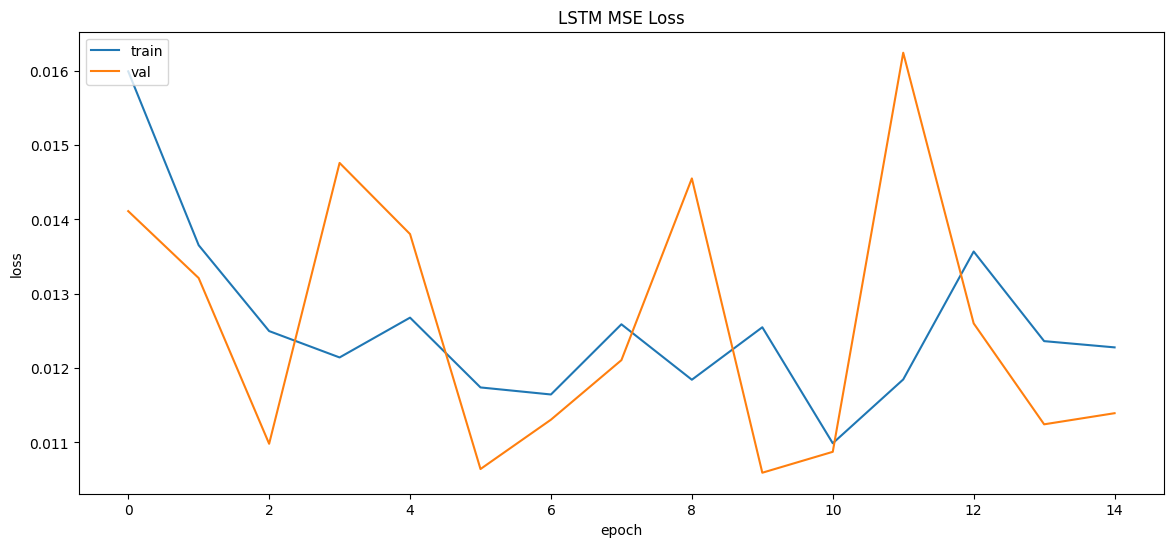

LSTM train loss: 0.012278789654374123
LSTM val loss: 0.011393427848815918


In [ ]:
# Plot the history performance scores for Train and Val sets
plt.figure(figsize=(14,6))
plt.plot(history_lstm.history[list(history_lstm.history.keys())[0]])
plt.plot(history_lstm.history[list(history_lstm.history.keys())[1]])
plt.title('LSTM MSE Loss')
plt.ylabel(list(history_lstm.history.keys())[0])
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Print loss value
train_loss = history_lstm.history['loss'][-1]
val_loss = history_lstm.history['val_loss'][-1]
print(f"LSTM train loss: {train_loss}")
print(f"LSTM val loss: {val_loss}")

In [ ]:
# LSTM Predict
lstm_train_predictions = LSTM_model.predict(x_train)
lstm_test_predictions = LSTM_model.predict(x_test)

313/313 [==============================] - 3s 6ms/step


In [ ]:
# Compute RMSE, MAE & Max_Error for each sequence of train and test sets

# Train Set
lstm_train_predictions = np.reshape(lstm_train_predictions, (lstm_train_predictions.shape[0], -1))
rmse_train_lstm=[]
mae_train_lstm=[]
max_error_train_lstm=[]

for i in range(len(y_train)):
  rmse_train_lstm.append(np.sqrt(mean_squared_error(y_train[i], lstm_train_predictions[i])))
  mae_train_lstm.append(mean_absolute_error(y_train[i], lstm_train_predictions[i]))
  max_error = np.max(np.abs(y_train[i] - lstm_train_predictions[i]))
  max_error = np.max(max_error)
  max_error_train_lstm.append(max_error)

# Test Set
lstm_test_predictions = np.reshape(lstm_test_predictions, (lstm_test_predictions.shape[0], -1))
rmse_test_lstm=[]
mae_test_lstm=[]
max_error_test_lstm=[]

for i in range(len(y_test)):
  rmse_test_lstm.append(np.sqrt(mean_squared_error(y_test[i], lstm_test_predictions[i])))
  mae_test_lstm.append(mean_absolute_error(y_test[i], lstm_test_predictions[i]))
  max_error = np.max(np.abs(y_test[i] - lstm_test_predictions[i]))
  max_error = np.max(max_error)
  max_error_test_lstm.append(max_error)

### Gated Recurrent Unit (GRU)

In [ ]:
# Create GRU Model
GRU_model = Sequential()
GRU_model.add(GRU(64, input_shape=(120, 1), return_sequences=True))
GRU_model.add(GRU(64, return_sequences=True))
GRU_model.add(Dense(1))
GRU_model.compile(optimizer=Adam(), loss=MeanSquaredError())

In [ ]:
# Fit GRU Model

start_time = time.time()

history_gru = GRU_model.fit(x_train, y_train, epochs=epochs,
                            validation_split=0.2, callbacks=[early_stopping])

end_time = time.time()
training_time_gru = end_time - start_time

Epoch 1/40
1000/1000 [==============================] - 15s 12ms/step - loss: 0.0158 - val_loss: 0.0151
Epoch 2/40
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0144 - val_loss: 0.0132
Epoch 3/40
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0141 - val_loss: 0.0132
Epoch 4/40
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0123 - val_loss: 0.0108
Epoch 5/40
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0109 - val_loss: 0.0097
Epoch 6/40
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0104 - val_loss: 0.0101
Epoch 7/40
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0098 - val_loss: 0.0090
Epoch 8/40
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 9/40
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 10/40
1000/1000 [==============================] - 10s 10m

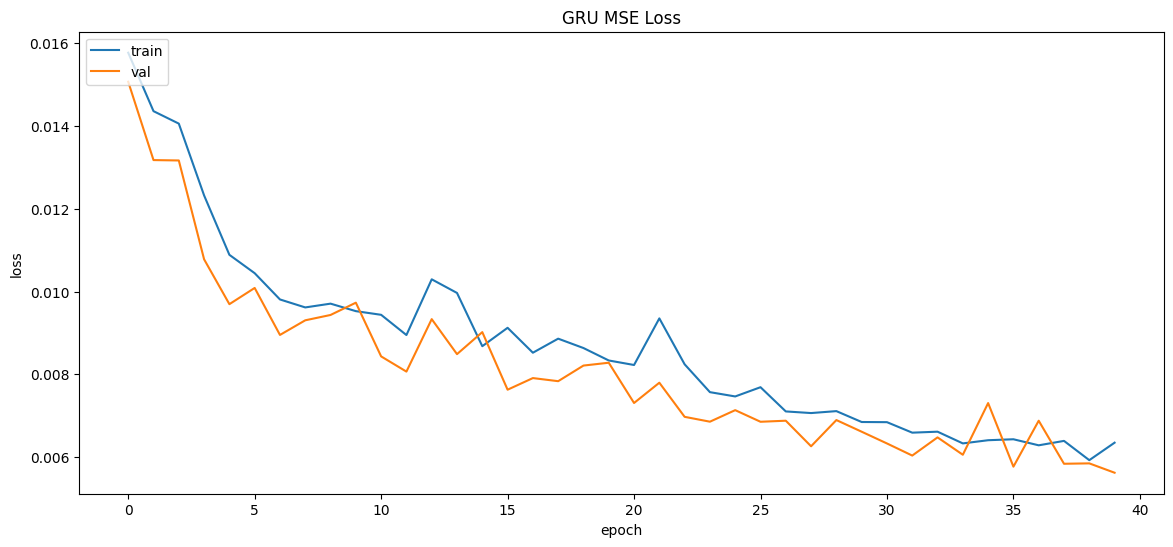

GRU train loss: 0.006350453477352858
GRU val loss: 0.005624846089631319


In [ ]:
# Plot the history performance scores for Train and Val sets
plt.figure(figsize=(14,6))
plt.plot(history_gru.history[list(history_gru.history.keys())[0]])
plt.plot(history_gru.history[list(history_gru.history.keys())[1]])
plt.title('GRU MSE Loss')
plt.ylabel(list(history_gru.history.keys())[0])
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Print loss value
train_loss = history_gru.history['loss'][-1]
val_loss = history_gru.history['val_loss'][-1]
print(f"GRU train loss: {train_loss}")
print(f"GRU val loss: {val_loss}")

In [ ]:
# GRU Predict
gru_train_predictions = GRU_model.predict(x_train)
gru_test_predictions = GRU_model.predict(x_test)

313/313 [==============================] - 3s 6ms/step


In [ ]:
# Compute RMSE, MAE & Max_Error for each sequence of train and test sets

# Train Set
gru_train_predictions = np.reshape(gru_train_predictions, (gru_train_predictions.shape[0], -1))
rmse_train_gru=[]
mae_train_gru=[]
max_error_train_gru=[]

for i in range(len(y_train)):
  rmse_train_gru.append(np.sqrt(mean_squared_error(y_train[i], gru_train_predictions[i])))
  mae_train_gru.append(mean_absolute_error(y_train[i], gru_train_predictions[i]))
  max_error = np.max(np.abs(y_train[i] - gru_train_predictions[i]))
  max_error = np.max(max_error)
  max_error_train_gru.append(max_error)

# Test Set
gru_test_predictions = np.reshape(gru_test_predictions, (gru_test_predictions.shape[0], -1))
rmse_test_gru=[]
mae_test_gru=[]
max_error_test_gru=[]

for i in range(len(y_test)):
  rmse_test_gru.append(np.sqrt(mean_squared_error(y_test[i], gru_test_predictions[i])))
  mae_test_gru.append(mean_absolute_error(y_test[i], gru_test_predictions[i]))
  max_error = np.max(np.abs(y_test[i] - gru_test_predictions[i]))
  max_error = np.max(max_error)
  max_error_test_gru.append(max_error)

### RNN, LSTM, GRU - Total RMSE, MAE, Max Error - Graphs

In [ ]:
# RNN Total Errors
rmse_train_rnn_total=sum(rmse_train_rnn)
mae_train_rnn_total=sum(mae_train_rnn)
max_error_train_rnn_total=max(max_error_train_rnn)
rmse_test_rnn_total=sum(rmse_test_rnn)
mae_test_rnn_total=sum(mae_test_rnn)
max_error_test_rnn_total=max(max_error_test_rnn)

# RNN Total Errors
rmse_train_lstm_total=sum(rmse_train_lstm)
mae_train_lstm_total=sum(mae_train_lstm)
max_error_train_lstm_total=max(max_error_train_lstm)
rmse_test_lstm_total=sum(rmse_test_lstm)
mae_test_lstm_total=sum(mae_test_lstm)
max_error_test_lstm_total=max(max_error_test_lstm)

# GRU Total Errors
rmse_train_gru_total=sum(rmse_train_gru)
mae_train_gru_total=sum(mae_train_gru)
max_error_train_gru_total=max(max_error_train_gru)
rmse_test_gru_total=sum(rmse_test_gru)
mae_test_gru_total=sum(mae_test_gru)
max_error_test_gru_total=max(max_error_test_gru)


In [ ]:
# Create a dictionary with train set errors per model
data = {
    'RNN': [rmse_train_rnn_total, mae_train_rnn_total, max_error_train_rnn_total],
    'LSTM': [rmse_train_lstm_total, mae_train_lstm_total, max_error_train_lstm_total],
    'GRU': [rmse_train_gru_total, mae_train_gru_total, max_error_train_gru_total]
}

# Create a DataFrame using the data dictionary and row names
train_errors = pd.DataFrame(data, index=['RMSE', 'MAE', 'Max Error'])

# Set the title for the DataFrame
train_errors.columns.name = 'Train Sets'

train_errors

Train Sets,RNN,LSTM,GRU
RMSE,2446.994699,2537.386775,1640.271203
MAE,1888.190596,1989.277534,1140.264467
Max Error,1.135439,0.903397,0.936921


In [ ]:
# Create a dictionary with test set errors per model
data = {
    'RNN': [rmse_test_rnn_total, mae_test_rnn_total, max_error_test_rnn_total],
    'LSTM': [rmse_test_lstm_total, mae_test_lstm_total, max_error_test_lstm_total],
    'GRU': [rmse_test_gru_total, mae_test_gru_total, max_error_test_gru_total]
}

# Create a DataFrame using the data dictionary and row names
test_errors = pd.DataFrame(data, index=['RMSE', 'MAE', 'Max Error'])

# Set the title for the DataFrame
test_errors.columns.name = 'Test Sets'

test_errors

Test Sets,RNN,LSTM,GRU
RMSE,602.678319,627.407036,408.536538
MAE,465.613966,492.663639,284.099821
Max Error,1.116155,0.895938,0.935777


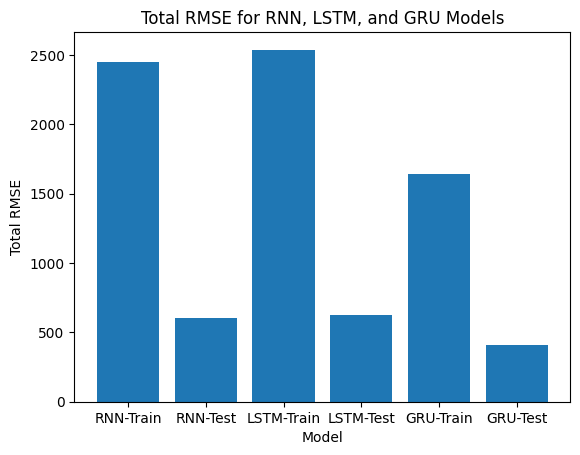

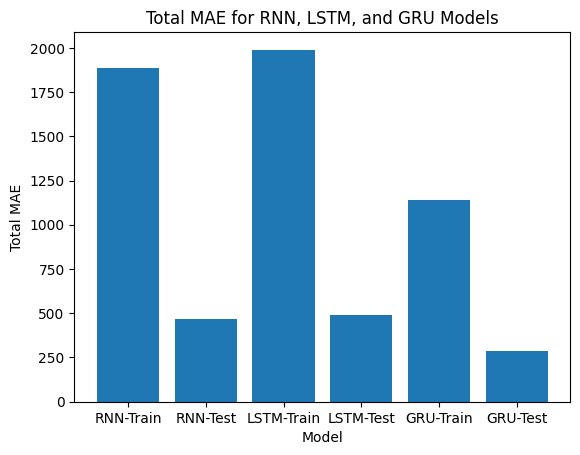

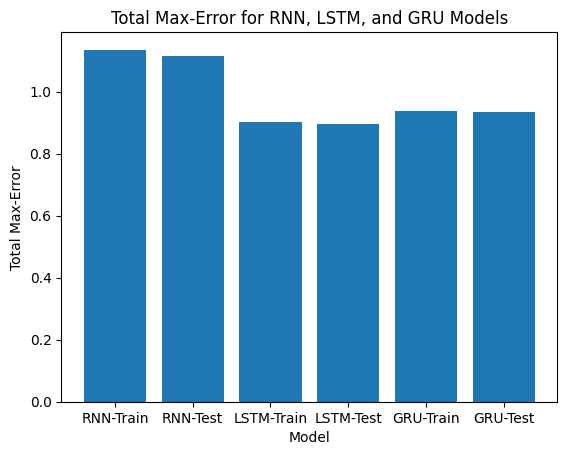

In [ ]:
# Creating a bar plot for the total RMSE
models = ['RNN-Train', 'RNN-Test', 'LSTM-Train', 'LSTM-Test', 'GRU-Train', 'GRU-Test']
rmse = [rmse_train_rnn_total, rmse_test_rnn_total, rmse_train_lstm_total,
              rmse_test_lstm_total, rmse_train_gru_total, rmse_test_gru_total]

plt.bar(models, rmse)
plt.xlabel('Model')
plt.ylabel('Total RMSE')
plt.title('Total RMSE for RNN, LSTM, and GRU Models')
plt.show()

# Creating a bar plot for the total MAE losses
mae = [mae_train_rnn_total, mae_test_rnn_total, mae_train_lstm_total,
              mae_test_lstm_total, mae_train_gru_total, mae_test_gru_total]

plt.bar(models, mae)
plt.xlabel('Model')
plt.ylabel('Total MAE')
plt.title('Total MAE for RNN, LSTM, and GRU Models')
plt.show()

# Creating a bar plot for the total MaxError losses
max_error = [max_error_train_rnn_total, max_error_test_rnn_total, max_error_train_lstm_total,
              max_error_test_lstm_total, max_error_train_gru_total, max_error_test_gru_total]

plt.bar(models, max_error)
plt.xlabel('Model')
plt.ylabel('Total Max-Error')
plt.title('Total Max-Error for RNN, LSTM, and GRU Models')
plt.show()

**Model Comparison** (select 4 random rows of test set, predict output and plot real and predicted outputs)

In [ ]:
# Select 4 random rows of test set,
# 2 with the WaterHeater turned of(all zero rows) & 2 with the WaterHeater in use.

# Set the seed for reproducibility
np.random.seed(72)

# Find rows with all zeros and select 2
zero_rows = np.where(np.all(y_test == 0, axis=1))[0]
selected_zero_rows = np.random.choice(zero_rows, size=2, replace=False)

# Find non-rows and select 2
non_zero_rows = np.where(np.any(y_test != 0, axis=1))[0]
selected_non_zero_rows = np.random.choice(non_zero_rows, size=2, replace=False)

# Combine the selected rows
selected_rows = np.concatenate((selected_zero_rows, selected_non_zero_rows))

# Get the rows from the y_test set
selected_y_data = y_test[selected_rows]

# Get the corresponding rows from the x_test set
selected_x_data = x_test[selected_rows]

In [ ]:
# Get Predictions for the above rows for all three models
rnn_4predictions = RNN_model.predict(selected_x_data)
rnn_4predictions = np.reshape(rnn_4predictions, (rnn_4predictions.shape[0], -1))
lstm_4predictions = LSTM_model.predict(selected_x_data)
lstm_4predictions = np.reshape(lstm_4predictions, (lstm_4predictions.shape[0], -1))
gru_4predictions = GRU_model.predict(selected_x_data)
gru_4predictions = np.reshape(gru_4predictions, (gru_4predictions.shape[0], -1))

1/1 [==============================] - 0s 23ms/step


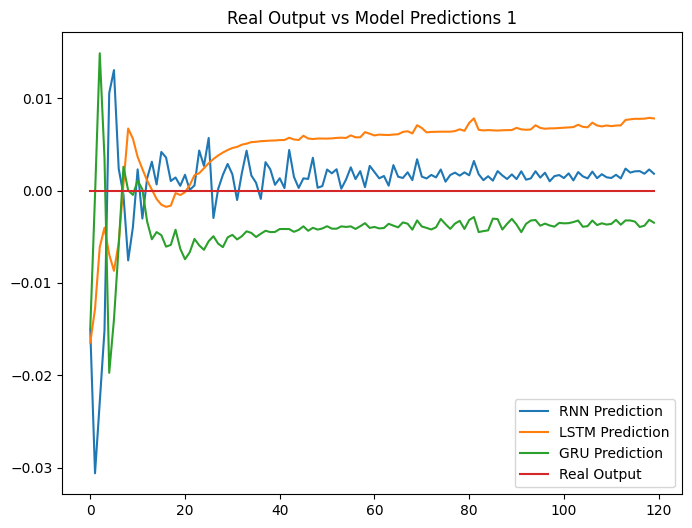

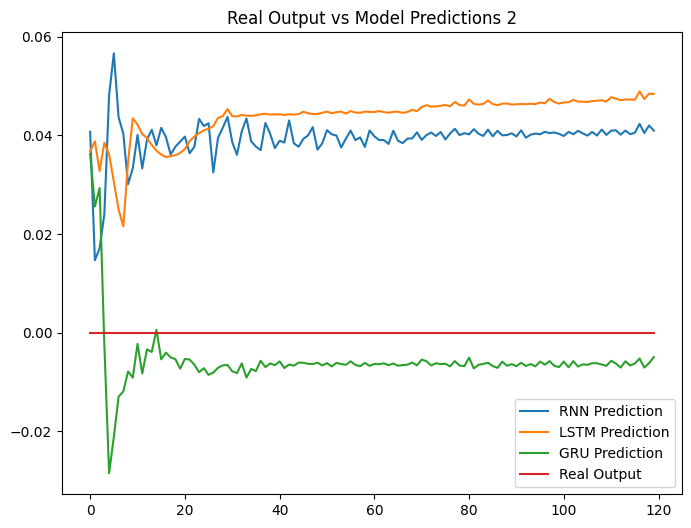

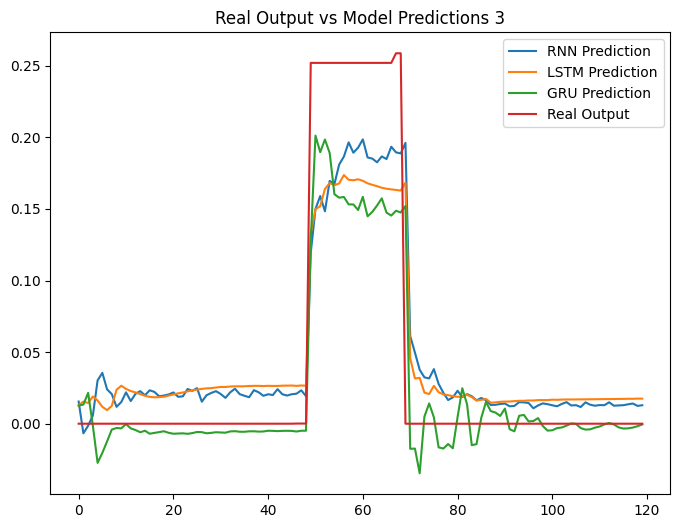

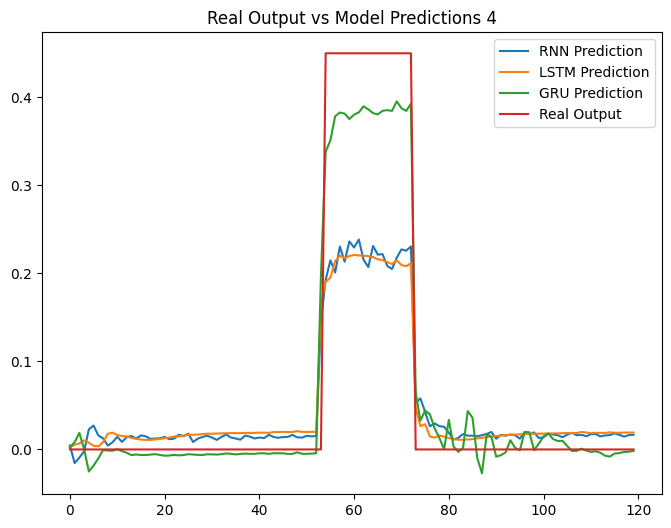

In [ ]:
for i in range(4):
  # Create the plot
  plt.figure(figsize=(8, 6))

  # Plot the data, add legends and title
  plt.plot(rnn_4predictions[i], label='RNN Prediction')
  plt.plot(lstm_4predictions[i], label='LSTM Prediction')
  plt.plot(gru_4predictions[i], label='GRU Prediction')
  plt.plot(selected_y_data[i], label='Real Output')
  plt.legend()
  plt.title(f'Real Output vs Model Predictions {i+1}')

  # Display the plot
  plt.show()


In [ ]:
end_time_total = time.time()
total_time = end_time_total - start_time_total

In [ ]:
# Training and Total Run Times

print("Training time RNN: ", round(training_time_rnn/60,2), "minutes")
print("Training time LSTM: ", round(training_time_lstm/60,2), "minutes")
print("Training time GRU: ", round(training_time_gru/60,2), "minutes")

print("Total time: ", round(total_time/60,2), "minutes")

Training time RNN:  44.46 minutes
Training time LSTM:  3.07 minutes
Training time GRU:  7.4 minutes
Total time:  58.94 minutes
